In [1]:
## 2.1 Reading and Understanding the Dataset
import pandas as pd
df = pd.read_csv("C:\\Users\\debas\\Downloads\\ipl.csv")

In [2]:
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
df.head()

Dataset shape: (76014, 15)

Data types:
 mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
## Removing Unnecessary Columns and Filtering Consistent Teams
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(columns=columns_to_remove, axis=1, inplace=True)

consistent_teams = [
    'Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
    'Delhi Daredevils', 'Sunrisers Hyderabad'
]
df = df[df['bat_team'].isin(consistent_teams) & df['bowl_team'].isin(consistent_teams)].copy()

df['date'] = pd.to_datetime(df['date'])
df = df[df['overs'] >= 5.0]
df.reset_index(drop=True, inplace=True)

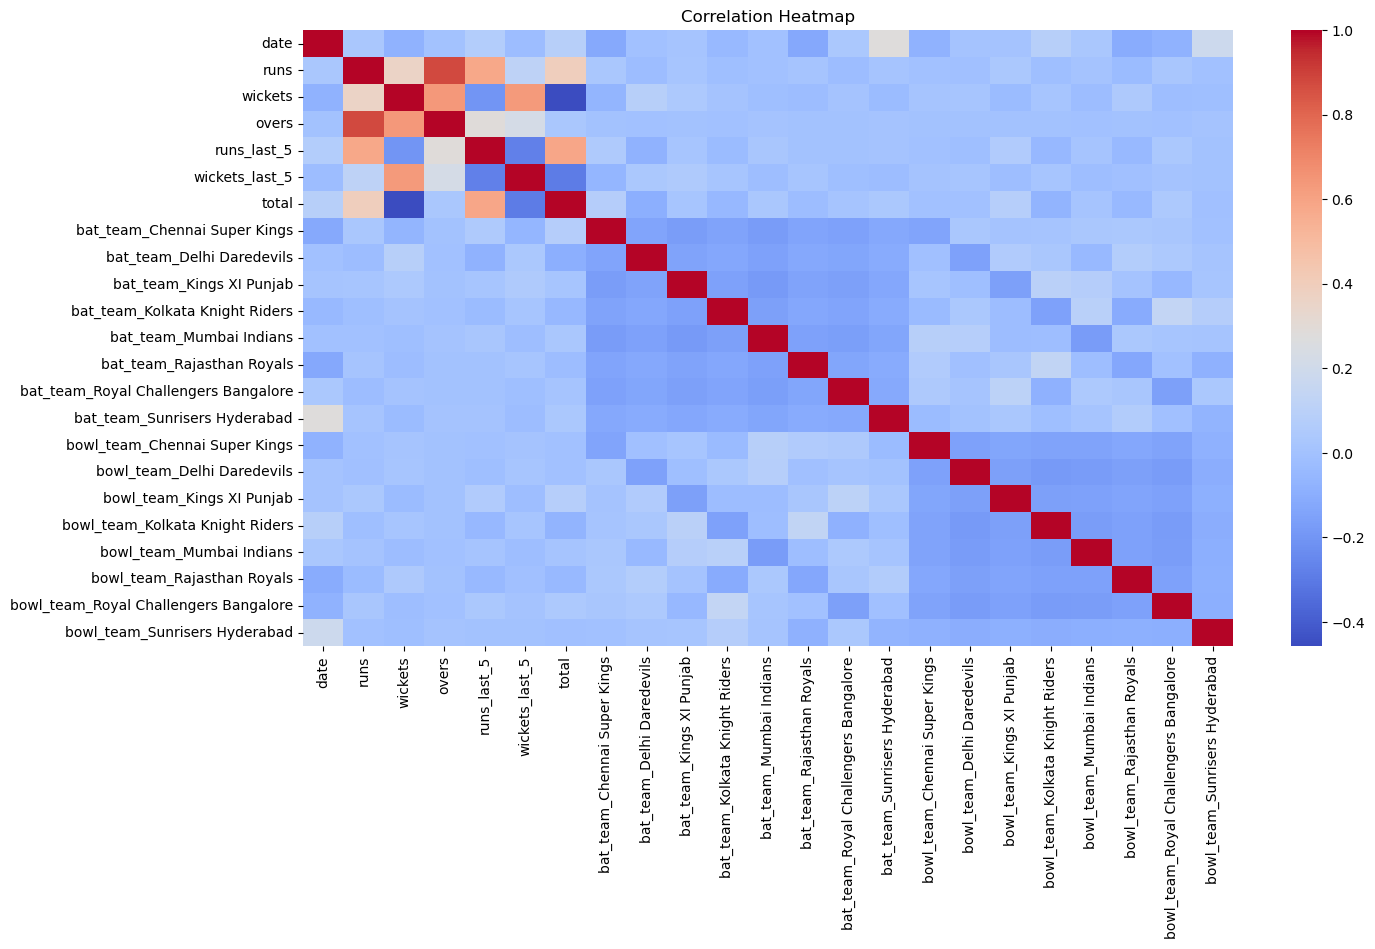

In [4]:
## Heatmap and Encoding Categorical Features
import seaborn as sns
import matplotlib.pyplot as plt

encoded_df = pd.get_dummies(df, columns=['bat_team', 'bowl_team'])

plt.figure(figsize=(15, 8))
sns.heatmap(encoded_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [5]:
## 3.4 Splitting Data into Training and Testing Sets
encoded_df = pd.get_dummies(df, columns=['bat_team', 'bowl_team'])
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [6]:
train_df = encoded_df[encoded_df['date'].dt.year <= 2016].copy()
test_df = encoded_df[encoded_df['date'].dt.year == 2017].copy()

train_df.drop('date', axis=1, inplace=True)
test_df.drop('date', axis=1, inplace=True)

In [7]:
X_train = train_df.drop('total', axis=1)
y_train = train_df['total']

X_test = test_df.drop('total', axis=1)
y_test = test_df['total']

In [8]:
## 4.1 Model Building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

ada_model = AdaBoostRegressor(estimator=LinearRegression(), n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

In [10]:
##  4.2 Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{model_name}:\n  R² Score: {r2:.4f}\n  MSE: {mse:.2f}\n")

In [11]:
evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, ada_pred, "AdaBoost (Linear Regression)")

Linear Regression:
  R² Score: 0.7523
  MSE: 251.01

Decision Tree:
  R² Score: 0.4671
  MSE: 539.92

Random Forest:
  R² Score: 0.6672
  MSE: 337.23

AdaBoost (Linear Regression):
  R² Score: 0.7584
  MSE: 244.80



In [12]:
## 5. Predicting Score for a Given Match Situation
def predict_score(model, batting_team, bowling_team, overs, runs, wickets, runs_last_5, wickets_last_5):
    teams = ['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab',
             'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
             'Royal Challengers Bangalore', 'Sunrisers Hyderabad']

    bat_vector = [1 if team == batting_team else 0 for team in teams]
    bowl_vector = [1 if team == bowling_team else 0 for team in teams]

    input_vector = bat_vector + bowl_vector + [overs, runs, wickets, runs_last_5, wickets_last_5]
    feature_names = list(X_train.columns)

    input_df = pd.DataFrame([input_vector], columns=feature_names)
    return model.predict(input_df)[0]

In [16]:
print("KKR vs DD (2018):", round(predict_score(lr_model, 'Kolkata Knight Riders', 'Delhi Daredevils', 10.0, 90, 2, 45, 1)))
print("SRH vs RCB (2018):", round(predict_score(lr_model, 'Sunrisers Hyderabad', 'Royal Challengers Bangalore', 12.0, 80, 3, 35, 2)))
print("MI vs KXIP (2019):", round(predict_score(lr_model, 'Mumbai Indians', 'Kings XI Punjab', 14.0, 120, 4, 55, 1)))
print("RR vs CSK (2019):", round(predict_score(lr_model, 'Rajasthan Royals', 'Chennai Super Kings', 15.0, 110, 5, 40, 2)))

KKR vs DD (2018): 184
SRH vs RCB (2018): 166
MI vs KXIP (2019): 176
RR vs CSK (2019): 163
